<html>
<body>
<h1 style = "color:blue"> Classify Euro coins into three different categories</h1>

<h2 style = "color:red"> Abstract: </h2>
<p>The goal of this notebook is to build a convNN clasification using Tensor Flow library that is desinged to classify a given image of an euro coin into four different categories:.</p>
<p> a) Categorie 0 = 2 euro, 1 euro, or no euro. </p>
<p> b) Categorie 1 = 50 cent, 20 cent, 10 cent. </p>
<p> c) Categorie 2 = 5 cent, 2 cent, 1 cent. </p>

<h2 style = "color:red"> Dataset: </h2>
<p>The dataset employed in the training process is given by the Euro Coin dataset.</p>
</body>
</html>


In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from coins_utils import *
    
#TRAIN_DIR = 'CandidateDataSet2/Augmented_and_Resized_RAW/all/' #For only rotations
TRAIN_DIR = 'CandidateDataSet2/augmented_and_resized_brightness_RAW/all/' #For rotations and brightness

images_full = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.jpg' in i]
random.shuffle(images_full)
n_images = len(images_full)
print("Number of images in full dataset "+str(n_images))
print("------------------------------------")


#Splitting of the input dataset into train, validation and test set.
train_to_full = 0.6 # Fraction of images used for training
validation_to_full = 0.8 # Fraction of images used for validation
train_to_full_index = int(n_images*train_to_full)
validation_to_full_index = int(n_images*validation_to_full)

#train_images = sorted(images_full[:train_to_full_index])
#validation_images =  sorted(images_full[train_to_full_index:validation_to_full_index])
#test_images =  sorted(images_full[validation_to_full_index:])

train_images = images_full[:train_to_full_index]
validation_images =  images_full[train_to_full_index:validation_to_full_index]
test_images =  images_full[validation_to_full_index:]

n_train_images = len(train_images)
n_validation_images = len(validation_images)
n_test_images = len(test_images)

print("Total number of train images "+str(n_train_images))
print("Total number of validation images "+str(n_validation_images))
print("Total number of test images "+str(n_test_images))
if n_train_images+n_validation_images+n_test_images - n_images != 0:
    print("Warning, there is a problem in the splitting of images")

train = prep_data(train_images)
validation = prep_data(validation_images)
test = prep_data(test_images)

#To make them easier to operate in future
train_images_name = [i.split('/')[-1] for i in train_images]
validation_images_name = [i.split('/')[-1] for i in validation_images]
test_images_name = [i.split('/')[-1] for i in test_images]
print(len(train_images_name), len(validation_images_name), len(test_images_name))

Using TensorFlow backend.


Number of images in full dataset 121320
------------------------------------
Total number of train images 72792
Total number of validation images 24264
Total number of test images 24264
Processed 0 of 72792
Processed 1000 of 72792
Processed 2000 of 72792
Processed 3000 of 72792
Processed 4000 of 72792
Processed 5000 of 72792
Processed 6000 of 72792
Processed 7000 of 72792
Processed 8000 of 72792
Processed 9000 of 72792
Processed 10000 of 72792
Processed 11000 of 72792
Processed 12000 of 72792
Processed 13000 of 72792
Processed 14000 of 72792
Processed 15000 of 72792
Processed 16000 of 72792
Processed 17000 of 72792
Processed 18000 of 72792
Processed 19000 of 72792
Processed 20000 of 72792
Processed 21000 of 72792
Processed 22000 of 72792
Processed 23000 of 72792
Processed 24000 of 72792
Processed 25000 of 72792
Processed 26000 of 72792
Processed 27000 of 72792
Processed 28000 of 72792
Processed 29000 of 72792
Processed 30000 of 72792
Processed 31000 of 72792
Processed 32000 of 72792
Pr

# Getting the LABELS

In [30]:
## read the labels.
labels = pd.read_csv(TRAIN_DIR+'/labels_all.csv')

labels_train_df = labels[labels["FileName"].isin(train_images_name)]
labels_validation_df = labels[labels["FileName"].isin(validation_images_name)]
labels_test_df = labels[labels["FileName"].isin(test_images_name)]


#Example get the Group field and create array with labels (This is not very efficient...)
nb_classes = 3
#labels_train_nocategorical = []
labels_train_nocategorical = len(train_images_name)*[None]
k = 0
for kitem in train_images_name:
        labels_train_nocategorical[k] = labels[labels["FileName"] == kitem].iloc[0][2]
        k += 1
        #labels_train_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][2])
labels_train_nocategorical= np.array(labels_train_nocategorical)
print('Train set labels read!')
    
#labels_validation_nocategorical = []
labels_validation_nocategorical = len(validation_images_name)*[None]
k = 0
for kitem in validation_images_name:
        labels_validation_nocategorical[k] = labels[labels["FileName"] == kitem].iloc[0][2]
        k += 1
        #labels_validation_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][2])      
labels_validation_nocategorical= np.array(labels_validation_nocategorical)
print('Validation set labels read!')

labels_test_nocategorical = []
labels_test_nocategorical = len(test_images_name)*[None]
k = 0
for kitem in test_images_name:
        labels_test_nocategorical[k] = labels[labels["FileName"] == kitem].iloc[0][2]
        k += 1
        #labels_test_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][2])      
labels_test_nocategorical= np.array(labels_test_nocategorical)
print('Test set labels read!')


#Convert to categorical labels (vectors)
from keras.utils import np_utils
labels_train = np_utils.to_categorical(labels_train_nocategorical, nb_classes)
labels_validation = np_utils.to_categorical(labels_validation_nocategorical, nb_classes)
labels_test = np_utils.to_categorical(labels_test_nocategorical, nb_classes)

Train set labels read!
Validation set labels read!
Test set labels read!


# Sanity check, we are reading everything properly

P70210-162316_Candidate_4_Aug_100_0_Brightness_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


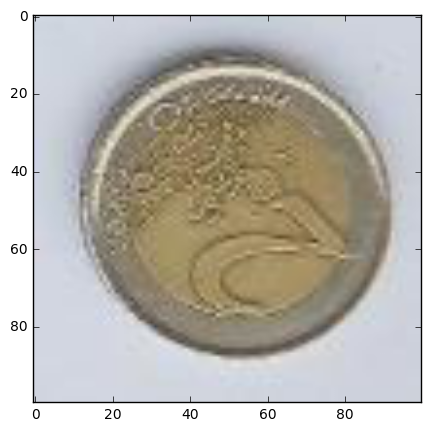

P70216-140426_Candidate_15_Aug_100_0_Brightness_100.jpg
This is 5, 2, 1 cent
(100, 100, 3)


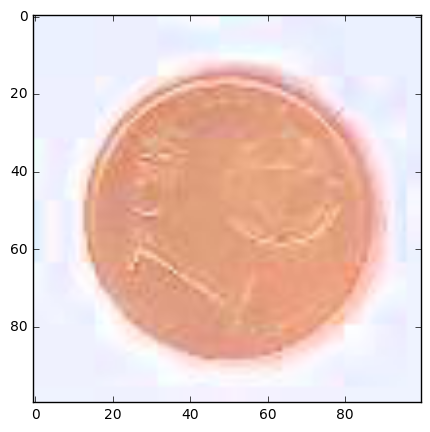

P70210-162747_Candidate_9_Aug_100_180_Brightness_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


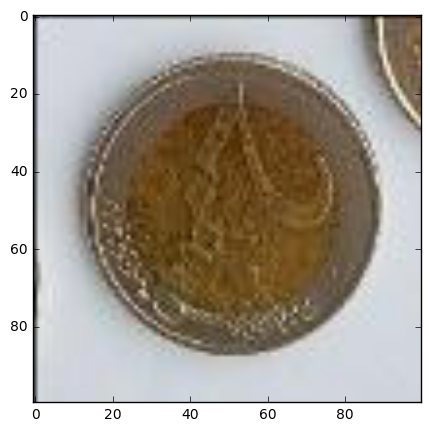

P70216-141409_Candidate_7_Aug_100_0_Brightness_100.jpg
This is 5, 2, 1 cent
(100, 100, 3)


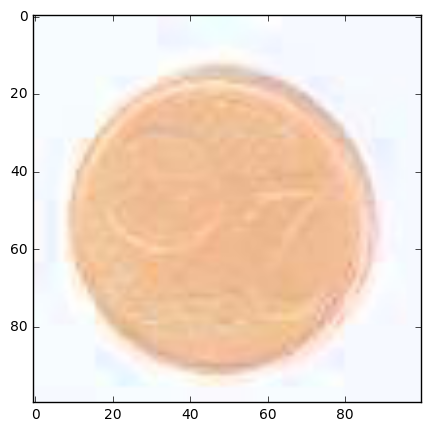

P70216-140954_Candidate_14_Aug_100_0_Brightness_100.jpg
This is 5, 2, 1 cent
(100, 100, 3)


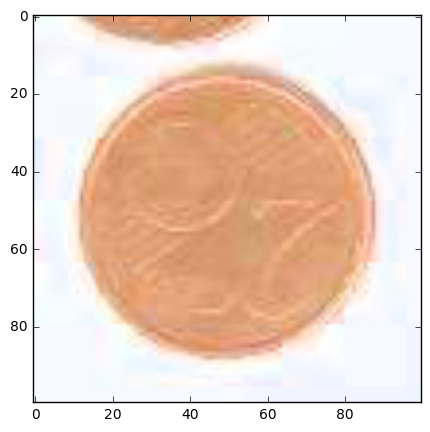

P70210-164128_Candidate_20_Aug_100_90_Brightness_-50.jpg
This is 1 euro or 2 euro
(100, 100, 3)


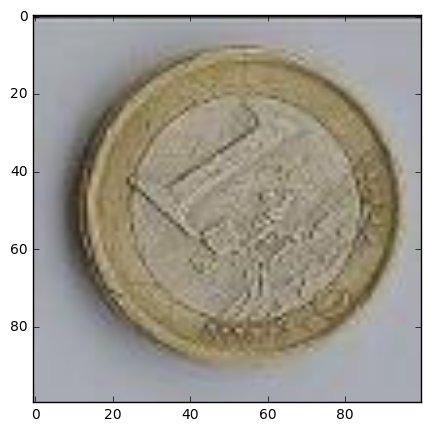

P70216-135949_Candidate_17_Aug_100_0_Brightness_-50.jpg
This is 5, 2, 1 cent
(100, 100, 3)


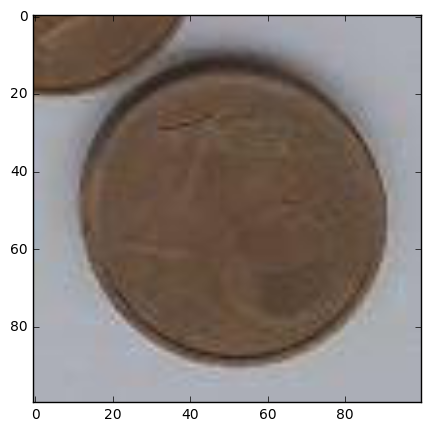

P70216-135933_Candidate_23_Aug_100_90_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


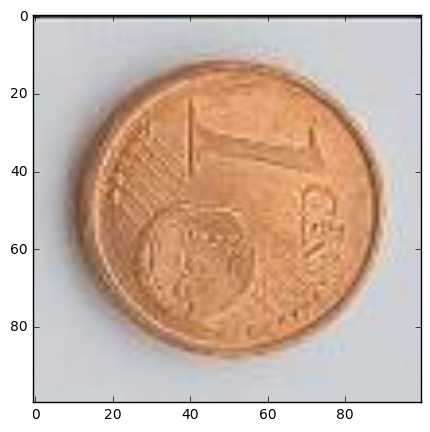

P70216-141149_Candidate_23_Aug_100_270_Brightness_50.jpg
This is 5, 2, 1 cent
(100, 100, 3)


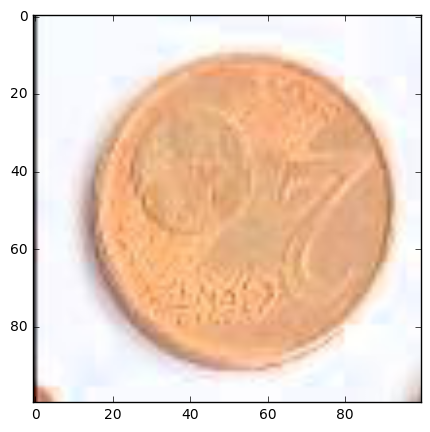

P70210-172107_Candidate_5_Aug_100_0_Brightness_-100.jpg
This is 5, 2, 1 cent
(100, 100, 3)


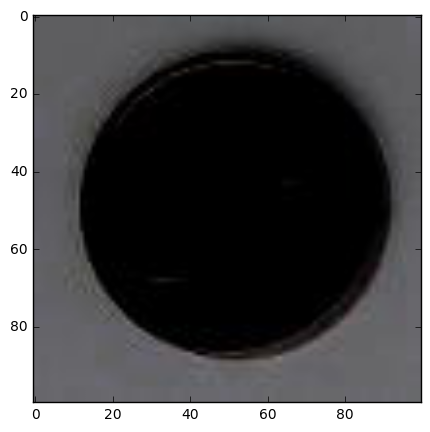

P70210-170718_Candidate_20_Aug_100_270_Brightness_-50.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


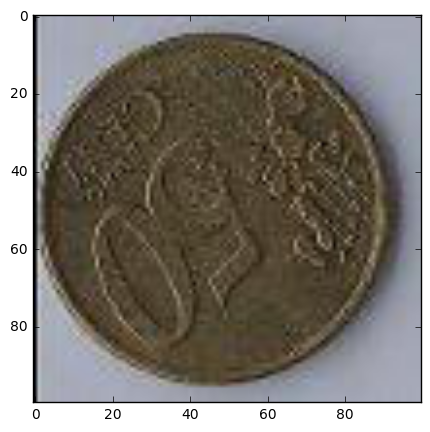

P70210-173403_Candidate_9_Aug_100_270_Brightness_100.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


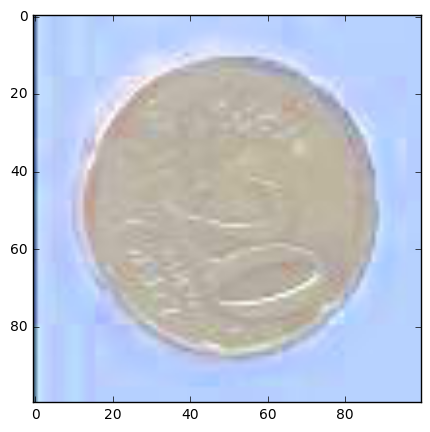

P70210-171208_Candidate_10_Aug_100_90_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


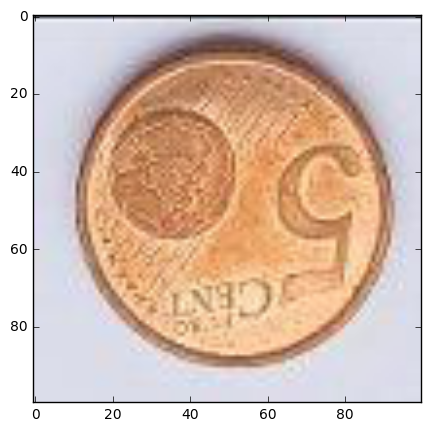

P70216-135837_Candidate_1_Aug_100_90_Brightness_-50.jpg
This is 5, 2, 1 cent
(100, 100, 3)


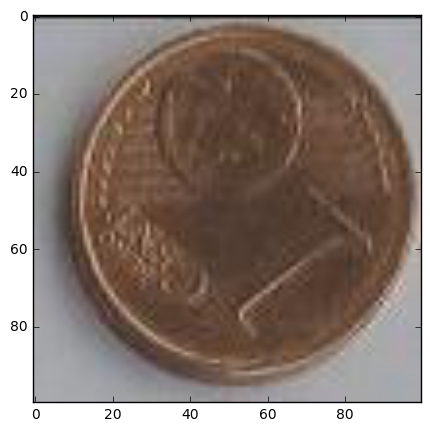

P70216-141622_Candidate_9_Aug_100_90_Brightness_-50.jpg
This is 5, 2, 1 cent
(100, 100, 3)


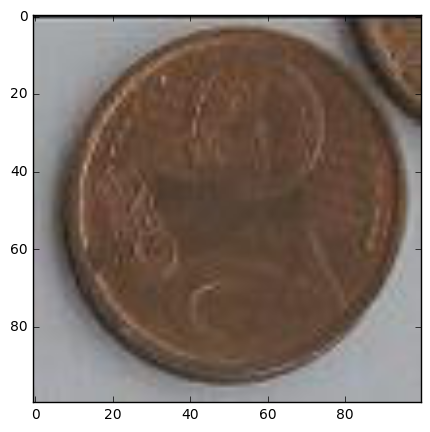

P70216-140105_Candidate_15_Aug_100_270_Brightness_-100.jpg
This is 5, 2, 1 cent
(100, 100, 3)


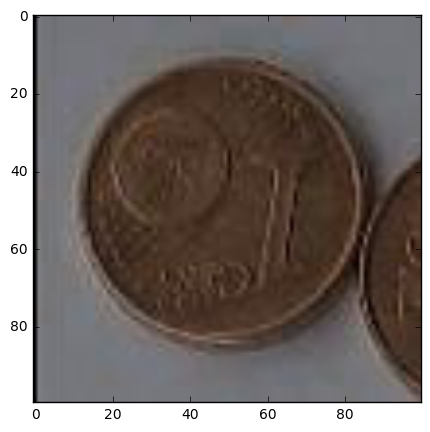

P70210-162818_Candidate_1_Aug_100_0_Brightness_-100.jpg
This is 1 euro or 2 euro
(100, 100, 3)


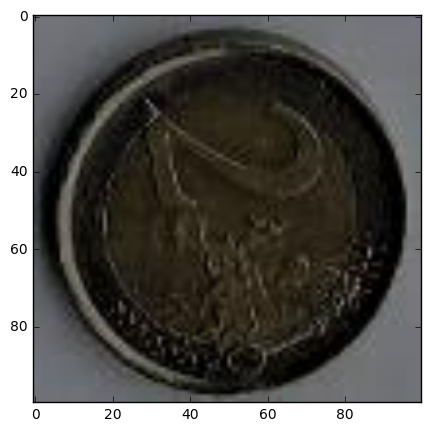

P70216-134135_Candidate_10_Aug_100_90_Brightness_-50.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


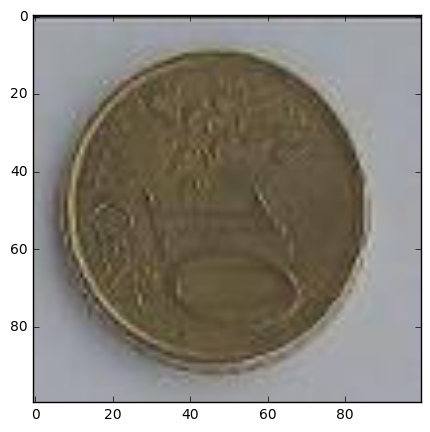

P70216-141456_Candidate_17_Aug_100_90_Brightness_100.jpg
This is 5, 2, 1 cent
(100, 100, 3)


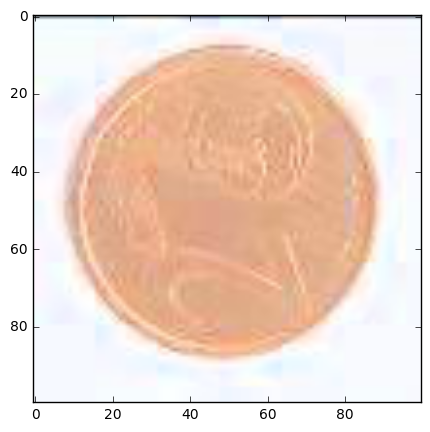

P70210-162423_Candidate_22_Aug_100_0_Brightness_-50.jpg
This is 1 euro or 2 euro
(100, 100, 3)


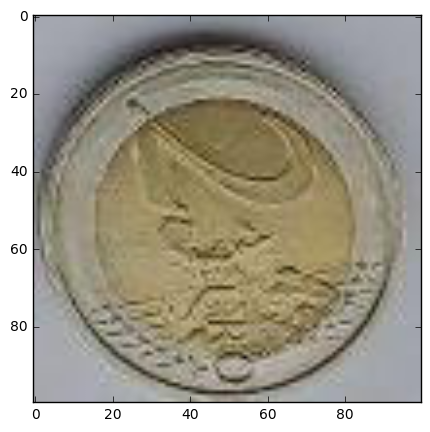

P70216-141548_Candidate_2_Aug_100_90_Brightness_50.jpg
This is 5, 2, 1 cent
(100, 100, 3)


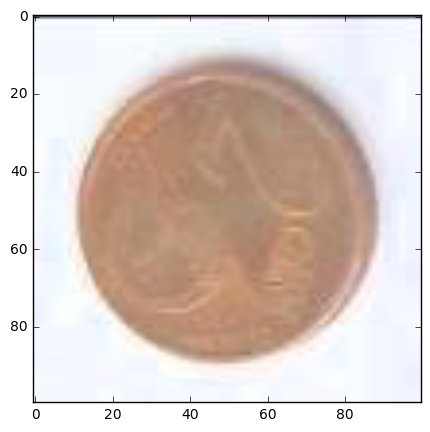

P70216-141638_Candidate_3_Aug_100_180_Brightness_-50.jpg
This is 5, 2, 1 cent
(100, 100, 3)


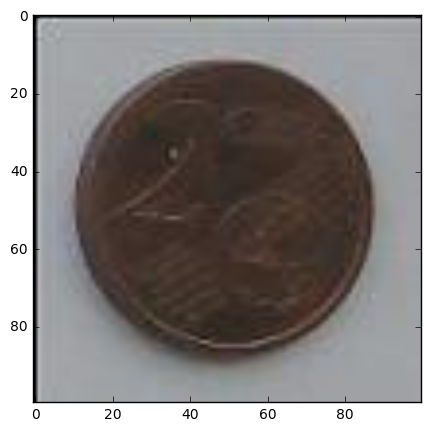

P70210-164314_Candidate_12_Aug_100_90_Brightness_100.jpg
This is 1 euro or 2 euro
(100, 100, 3)


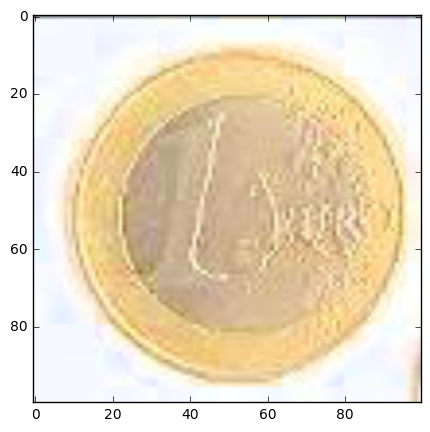

P70216-140827_Candidate_6_Aug_100_180_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


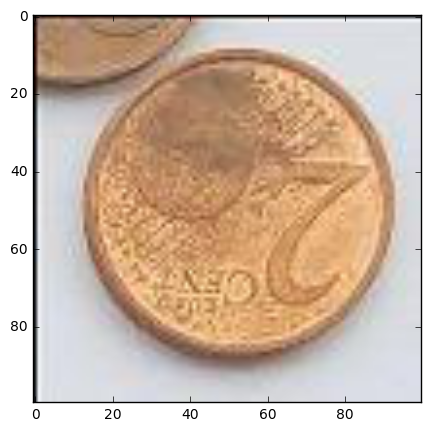

P70210-162236_Candidate_3_Aug_100_0_Brightness_-100.jpg
This is 1 euro or 2 euro
(100, 100, 3)


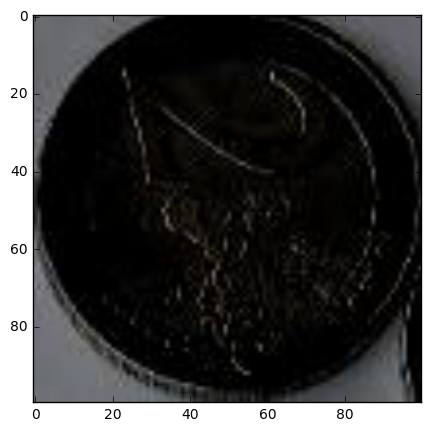

P70210-173538_Candidate_6_Aug_100_180_Brightness_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


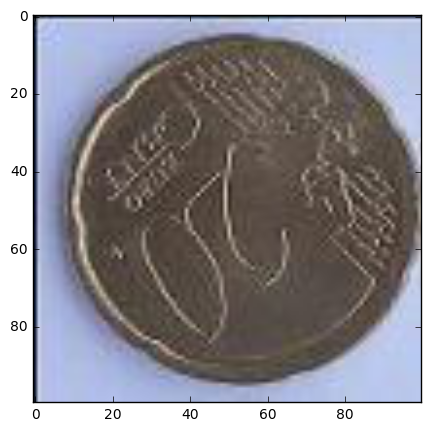

P70210-170700_Candidate_9_Aug_100_90_Brightness_-50.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


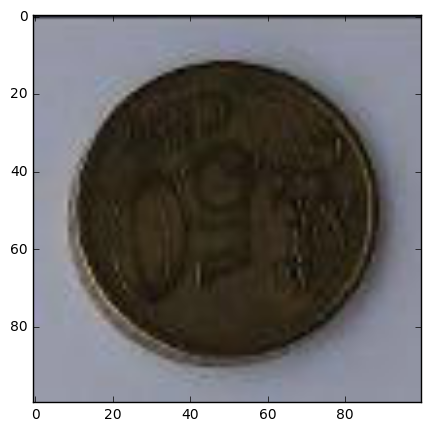

P70210-161828_Candidate_7_Aug_100_270_Brightness_-100.jpg
This is 1 euro or 2 euro
(100, 100, 3)


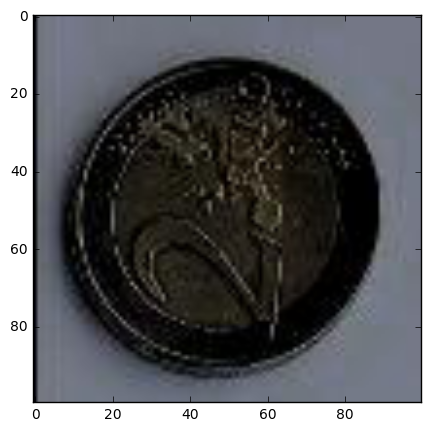

P70210-162929_Candidate_1_Aug_100_180_Brightness_50.jpg
This is 1 euro or 2 euro
(100, 100, 3)


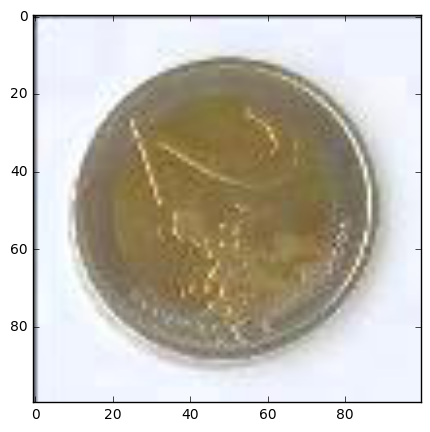

P70210-173432_Candidate_9_Aug_100_270_Brightness_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


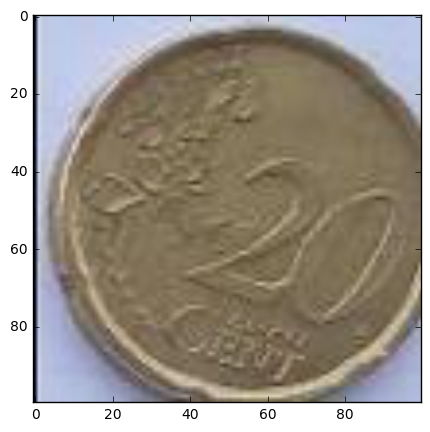

In [31]:
#Print some coins
def printSomeCoints(img, train_images_name, labels, ncoins):
    for i in range(0,ncoins):
        print(train_images_name[i])
        if labels[i] == 0.:
            print("This is 1 euro or 2 euro")
        if labels[i] == 1.:
            print("This is 50, 20 or 10 cent")
        if labels[i] == 2.:
            print("This is 5, 2, 1 cent")
        plt.figure(figsize=(10,5))
        print(train[i].shape)
        plt.imshow(train[i])
        plt.show()
    
    
printSomeCoints(train, train_images_name, labels_train_nocategorical, 30)

<html>
<body>
<h2 style = "color:red"> Building the classificator (work in progress..): </h2>
<p> Use the training dataset to build the classificator using a ConvNN.</p>
</body>
</html>

In [32]:
#Loading keras deep learnig libraries to build the model: https://keras.io/ 
from keras.layers import Input, Dense, Flatten, Dropout, Activation, advanced_activations, Convolution2D, MaxPooling2D
from keras.models import Model, model_from_json
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import initializations

In [34]:
#Model hyperparameters
batch_size = 32 # in each iteration, we consider batch_size training examples at once
num_epochs = 15 # we iterate num_epochs times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 62 # ...switching to 64 after the first pooling layer
conv_depth_3 = 128 # ...switching to 64 after the first pooling layer
conv_depth_4 = 256 # ...switching to 64 after the first pooling layer
conv_depth_5 = 512 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with this probability 
drop_prob_2 = 0.5 # dropout in the FC layer with this probability 
hidden_size = 64 # the FC layer will this neurons
data_augmentation = False # Whether to use or not data augmentation

ROWS = 100
COLS = 100
CHANNELS = 3

NN = False
ConvNN = True
if ConvNN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!
    conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='tanh')(inp)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1)
    conv_2 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_1)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    conv_3 = Convolution2D(conv_depth_3, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_2)
    #pool_3 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_3)
    #conv_4 = Convolution2D(conv_depth_4, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_3)
    #pool_4 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    #conv_5 = Convolution2D(conv_depth_5, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_4)
                       

    flat = Flatten()(conv_3)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

if NN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!                  
    flat = Flatten()(inp)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

    
#print the summary of the architecture
model.summary()

#Visulize the model if desired
#from keras.utils.visualize_util import plot
#plot(model, to_file='Example_of_CNN_CatsVsDogs.pdf')

# reduce the learning rate by factor of 0.5 if the validation loss does not get lower in 7 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')


# Let's train the model using SGD
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

# Let's train the SGD model WITHOUT using data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train, labels_train, batch_size=batch_size, nb_epoch=num_epochs, validation_data=(validation, labels_validation), shuffle=True, callbacks=[reduce_lr,early_stopping])
                       
                       

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 100, 100, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 100, 100, 32)  896         input_2[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 50, 50, 32)    0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 50, 50, 62)    17918       maxpooling2d_3[0][0]             
___________________________________________________________________________________________

# Learning curves (check the performance)

dict_keys(['val_loss', 'val_acc', 'lr', 'loss', 'acc'])


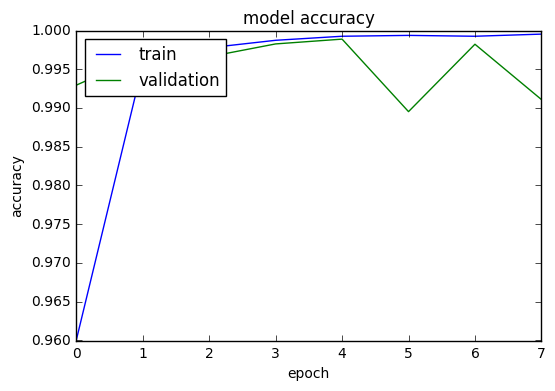

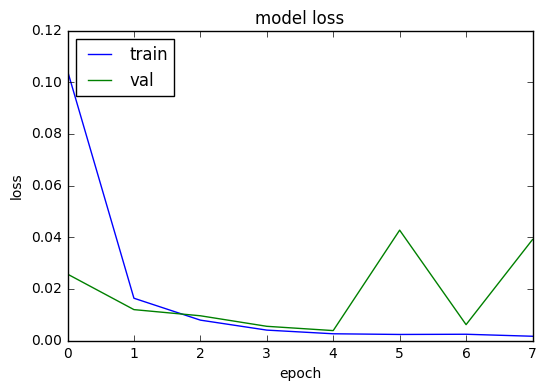

In [35]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Accuracy_Example_Coin_Classifier.pdf')
plt.close()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('Loss_Example_Coin_Classifier.pdf')
plt.close()

# Save 

In [36]:
SaveModel(model, "Model_Example_Coin_Classifier")

Saved model Model_Example_Coin_Classifier to disk


0

# Load and Test model

Loaded model Model_Example_Coin_Classifier from disk 

PREDICTIONS 

 0.19896129 of 1,2 euro 

 0.01325301 of 50,20,10 cent 

 0.00001721 of 5,2,1 



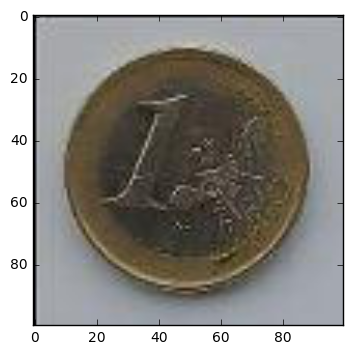

 0.00000184 of 1,2 euro 

 0.93625176 of 50,20,10 cent 

 0.00000085 of 5,2,1 



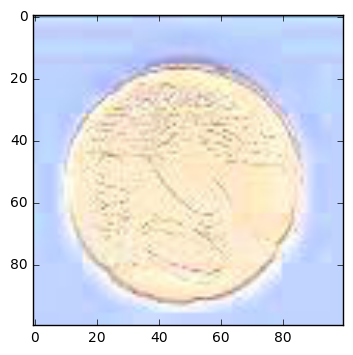

 0.00000235 of 1,2 euro 

 0.00000684 of 50,20,10 cent 

 0.87826210 of 5,2,1 



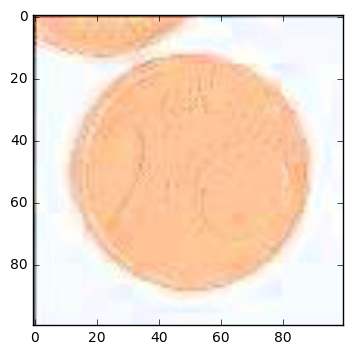

 0.51272660 of 1,2 euro 

 0.00016115 of 50,20,10 cent 

 0.00000781 of 5,2,1 



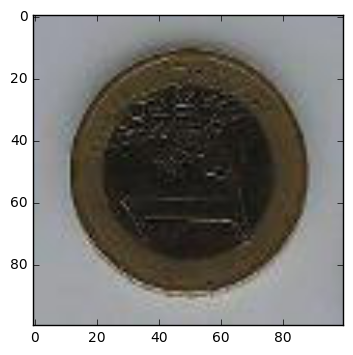

 0.00000270 of 1,2 euro 

 0.00002708 of 50,20,10 cent 

 0.85787845 of 5,2,1 



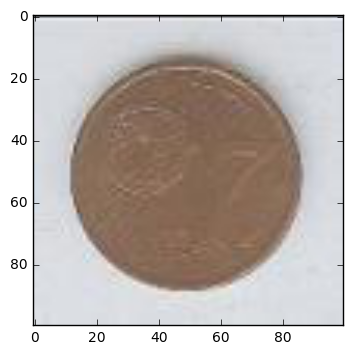

 0.00000241 of 1,2 euro 

 0.00001097 of 50,20,10 cent 

 0.87709671 of 5,2,1 



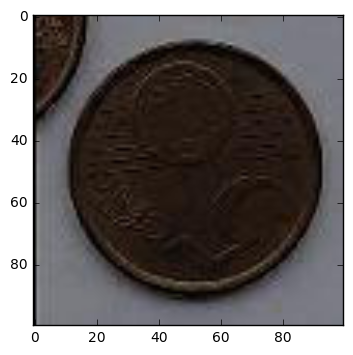

 0.00000255 of 1,2 euro 

 0.00000635 of 50,20,10 cent 

 0.88838375 of 5,2,1 



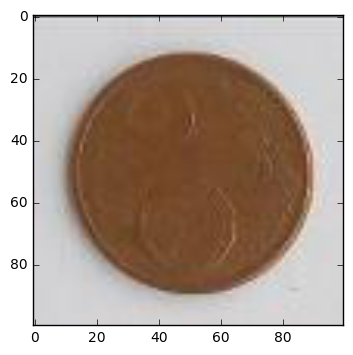

 0.00000437 of 1,2 euro 

 0.00001334 of 50,20,10 cent 

 0.88430041 of 5,2,1 



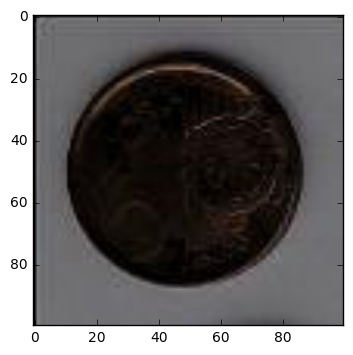

 0.00000070 of 1,2 euro 

 0.96588922 of 50,20,10 cent 

 0.00000102 of 5,2,1 



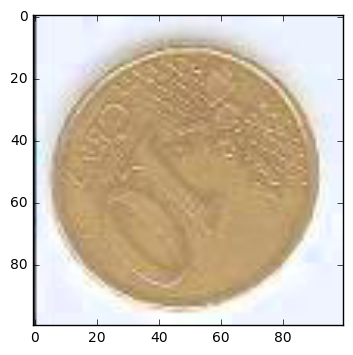

 0.00000250 of 1,2 euro 

 0.89427680 of 50,20,10 cent 

 0.00000081 of 5,2,1 



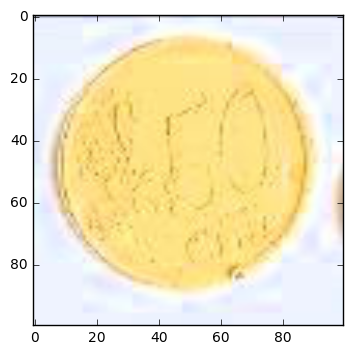

In [37]:
#Useful to test.
LoadAndTest = True
nTest = 10
if LoadAndTest == True:
    loaded_model=LoadModel("Model_Example_Coin_Classifier")  
    # evaluate loaded model on test data
    loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
    
    #score_train = loaded_model.evaluate(train, labels_train, verbose=0)
    #score_validation = loaded_model.evaluate(validation, labels_validation, verbose=0)
    #print "Training %s: %.2f%%" % (loaded_model.metrics_names[1], score_train[1]*100)
    #print "Validation %s: %.2f%%" % (loaded_model.metrics_names[1], score_validation[1]*100)    
    
    print("PREDICTIONS \n")
    reduced_test = test[:nTest]
    predictedLabel = loaded_model.predict(reduced_test)

    for i in range(0,nTest):
        print(" %.8f of 1,2 euro \n" % predictedLabel[i,0])
        print(" %.8f of 50,20,10 cent \n" % predictedLabel[i,1])
        print(" %.8f of 5,2,1 \n" % predictedLabel[i,2])

        plt.imshow(reduced_test[i])
        plt.show()
    
        
    